# 1

# 2

# データ探索

juliaにはStatsBase.jlと言われるパッケージがあり、統計にひつような関数を含んでいる。  


```
Julia> Pkg.update()  
Julia> Pkg.add("StatsBase")  
Julia> Pkg.add("RDatasets") # 2.2章でやった

```

により、StatsBaseパッケージを追加する

## サンプリング

### 母集団

In [1]:
using StatsBase
using RDatasets # Rのデータセットを使う

In [2]:
iris_dataframe = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [10]:
head(iris_dataframe)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [12]:
sample(iris_dataframe[:SepalLength], 5)

5-element Array{Float64,1}:
 4.8
 6.0
 6.4
 5.5
 6.9

In [14]:
sample(iris_dataframe[:SepalLength], 5)

5-element Array{Float64,1}:
 4.9
 4.9
 6.1
 4.4
 6.3

In [21]:
sumple(x,num_of_elements[;  replace = true, ordered = false])

LoadError: [91msyntax: unexpected ";"[39m

### 重みベクトル

In [23]:
w = WeightVec([1.,2.,3.],6.)

  likely near In[23]:1


3-element StatsBase.Weights{Float64,Float64,Array{Float64,1}}:
 1.0
 2.0
 3.0

`StatsBase.WeightVec`は推奨されないようだ。`StatsBase.Weights`を使うと良いらしい

In [5]:
?StatsBase.Weights

```
Weights(vs, wsum=sum(vs))
```

Construct a `Weights` vector with weight values `vs`. A precomputed sum may be provided as `wsum`.

The `Weights` type describes a generic weights vector which does not support all operations possible for [`FrequencyWeights`](@ref), [`AnalyticWeights`](@ref) and [`ProbabilityWeights`](@ref).


In [10]:
wv = StatsBase.Weights([1.,2.,3.],6.)

3-element StatsBase.Weights{Float64,Float64,Array{Float64,1}}:
 1.0
 2.0
 3.0

In [11]:
eltype(wv)

Float64

In [12]:
length(wv)

3

In [14]:
isempty(wv)

false

In [15]:
values(wv)

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

In [16]:
sum(wv)

6.0

In [17]:
eltype(iris_dataframe)

Any

In [18]:
eltypes(iris_dataframe)

5-element Array{Type,1}:
 Float64
 Float64
 Float64
 Float64
 String 

## 列系の推定

In [19]:
typeof(iris_dataframe[1,:SepalLength])

Float64

In [20]:
typeof(iris_dataframe[1,:Species])

String

##  基本要約統計量

In [21]:
exam = dataset("mlmRev","Exam") # インナー・ロンドン地区の試験の得点

,School,NormExam,SchGend,SchAvg,VR,Intake,StandLRT,Sex,Type,Student
1,1,0.2613242,mixed,0.1661752,mid 50%,bottom 25%,0.6190592,F,Mxd,143
2,1,0.1340672,mixed,0.1661752,mid 50%,mid 50%,0.2058022,F,Mxd,145
3,1,-1.723882,mixed,0.1661752,mid 50%,top 25%,-1.364576,M,Mxd,142
4,1,0.9675862,mixed,0.1661752,mid 50%,mid 50%,0.2058022,F,Mxd,141
5,1,0.5443412,mixed,0.1661752,mid 50%,mid 50%,0.3711052,F,Mxd,138
6,1,1.7348992,mixed,0.1661752,mid 50%,bottom 25%,2.1894372,M,Mxd,155
7,1,1.0396082,mixed,0.1661752,mid 50%,top 25%,-1.116621,M,Mxd,158
8,1,-0.129085,mixed,0.1661752,mid 50%,mid 50%,-1.03397,M,Mxd,115
9,1,-0.939378,mixed,0.1661752,mid 50%,mid 50%,-0.538061,F,Mxd,117
10,1,-1.219486,mixed,0.1661752,mid 50%,top 25%,-1.447227,M,Mxd,113


In [22]:
describe(exam)

School
Summary Stats:
Length:         4059
Type:           String
Number Unique:  65
Number Missing: 0
% Missing:      0.000000

NormExam
Summary Stats:
Mean:           -0.000114
Minimum:        -3.666072
1st Quartile:   -0.699505
Median:         0.004322
3rd Quartile:   0.678759
Maximum:        3.666091
Length:         4059
Type:           Float64
Number Missing: 0
% Missing:      0.000000

SchGend
Summary Stats:
Length:         4059
Type:           String
Number Unique:  3
Number Missing: 0
% Missing:      0.000000

SchAvg
Summary Stats:
Mean:           0.001810
Minimum:        -0.755961
1st Quartile:   -0.149341
Median:         -0.020198
3rd Quartile:   0.210525
Maximum:        0.637656
Length:         4059
Type:           Float64
Number Missing: 0
% Missing:      0.000000

VR
Summary Stats:
Length:         4059
Type:           String
Number Unique:  3
Number Missing: 0
% Missing:      0.000000

Intake
Summary Stats:
Length:         4059
Type:           String
Number Unique:  3
Numb

### 配列またはDataFrameの平均値の計算

#### geomean

In [23]:
a = [123, 4234, 23423, 1231231, 1432432423, 1341413413]

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [40]:
geomean(a) # 幾何平均を計算する

553833.3901002567

幾何平均は、$\sqrt[n]{a_1 a_2...a_n}$のこと

#### harmmean 調和平均

In [43]:
harmmean(a)

713.4557870657444

調和平均は、$\dfrac{n}{\sum_{i=1}^n{\dfrac{1}{a_i}}}$

#### trimmean トリミングされたデータ集合の平均値

trimmeanは推奨されない。use mean(trim(x,p/2) instead

In [46]:
trimmean(a,0.1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] trimmean(::Array{Int64,1}, ::Float64) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /Users/purin/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/purin/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/purin/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[46], in expression starting on line 1


LoadError: [91mMethodError: no method matching trim(::Array{Int64,1}, ::Float64)[0m
Closest candidates are:
  trim(::AbstractArray{T,1} where T; prop, count) at /Users/purin/.julia/v0.6/StatsBase/src/robust.jl:27[39m

In [38]:
mean(trim(a,prop=0.2))

3.3566807525e8

?trim


search: trim trim! trimvar trimmean trigamma stringmime StridedMatrix

Out[62]:  
trim(x; prop=0.0, count=0)  
Return a copy of x with either count or proportion prop of the highest and lowest elements removed. To compute the trimmed mean of x use mean(trim(x)); to compute the variance use trimvar(x) (see trimvar).  
4  Example  
julia> trim([1,2,3,4,5], prop=0.2)  
3-element Array{Int64,1}:  
 2  
 3  
 4  

#### 加重平均

In [39]:
a

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [40]:
wv = rand(6)

6-element Array{Float64,1}:
 0.581483 
 0.833487 
 0.0604145
 0.879385 
 0.468356 
 0.186882 

In [43]:
mean(a,weights(wv))

3.0653146322912383e8

##### mean(A::AbstractArray, w::AbstractWeights)

In [66]:
mean([1,2,3], weights([1,2,3]))

2.3333333333333335

In [67]:
1*(1/6) + 2*(2/6) + 3*(3/6)

2.333333333333333

?mean()


##### 本に乗っている例

In [70]:
mean(a,weights(wv))

3.0653146322912383e8

In [72]:
emp = []

for i = 1:6
    append!(emp,a[i]*(wv[i]/sum(wv)) )
end

sum(emp)

3.0653146322912383e8

## スカラー統計量

### 標準偏差と分散

In [68]:
a

6-element Array{Int64,1}:
        123
       4234
      23423
    1231231
 1432432423
 1341413413

In [73]:
var(a) # 標本分散

5.1354392444543296e17

In [75]:
a = [1 2;3 4;5 6;7 8;9 10]

5×2 Array{Int64,2}:
 1   2
 3   4
 5   6
 7   8
 9  10

In [76]:
var(a,2) # 行方向

5×1 Array{Float64,2}:
 0.5
 0.5
 0.5
 0.5
 0.5

In [77]:
var(a,1) # 列方向

1×2 Array{Float64,2}:
 10.0  10.0

In [78]:
std(a) # 標準偏差

3.0276503540974917

In [74]:
mean_and_var(a)

(5.5, 9.166666666666666)

In [75]:
mean_and_std(a)

(5.5, 3.0276503540974917)

In [77]:
a = [12,234,567,1234,535,335,19]

7-element Array{Int64,1}:
   12
  234
  567
 1234
  535
  335
   19

#### 歪度（わいど）と尖度（せんど）

In [80]:
skewness(a) #歪度（わいど）

0.9763073577410081

歪度（わいど）は$\dfrac{E[(X-\mu)^3]}{\sigma^3}$

In [81]:
kurtosis(a) #尖度（せんど）

0.04885930438714192

尖度（せんど）は$\dfrac{E[(X-\mu)^4]}{\sigma^4}-3$

#### k次の中心モーメント

In [86]:
moment(a,3)

5.806162264723031e7

## 変動の計算量

#### span データ集合の全範囲

In [88]:
a

7-element Array{Int64,1}:
   12
  234
  567
 1234
  535
  335
   19

In [96]:
span(a) # データ集合の全範囲

12:1234

#### <font color="red">cv 変動係数(Coefficient of variation)</font>

In [95]:
variation(a)

1.0051933013705867

In [97]:
a = [12,23,45,68,99,72,61,39,21,71]

10-element Array{Int64,1}:
 12
 23
 45
 68
 99
 72
 61
 39
 21
 71

In [98]:
mad(a)

27.428141042353634

In [82]:
mad(a,5)

LoadError: [91mMethodError: no method matching mad(::Array{Int64,2}, ::Int64)[0m
Closest candidates are:
  mad(::AbstractArray{T<:Real,N} where N) where T<:Real at /Users/purin/.julia/v0.6/StatsBase/src/scalarstats.jl:246[39m

<font color="Red">madの第２の引数は与えられない？</font>

In [100]:
?mad

search: mad maxad Markdown muladd mapreduce mapreducedim meanad ismarked



```
mad(v)
```

Compute the median absolute deviation of `v`.


### zスコア

In [84]:
a = [12,23,45,68,99,72,61,39,21,71]

10-element Array{Int64,1}:
 12
 23
 45
 68
 99
 72
 61
 39
 21
 71

In [85]:
zscore(a)

10-element Array{Float64,1}:
 -1.4102  
 -1.01347 
 -0.220005
  0.609522
  1.72758 
  0.753788
  0.357057
 -0.436403
 -1.0856  
  0.717721

### エントロピー

In [86]:
using Distributions

In [87]:
d = Dirichlet([1.0,3.0,5.0])

Distributions.Dirichlet{Float64}(alpha=[1.0, 3.0, 5.0])

In [88]:
arr = rand(d)

3-element Array{Float64,1}:
 0.138886
 0.354438
 0.506676

In [89]:
sum(arr)

1.0

In [93]:
entropy(arr)　#第２引数がない場合は自然対数が用いられる

0.9862865573129583

In [91]:
entropy(arr,2) # 第２引数は、対数の引数になる

1.4229107251308535

#### <font color = "red">クロスエントロピー</font>

In [99]:
crossentropy(0.5,0.5)

LoadError: [91mMethodError: no method matching crossentropy(::Float64, ::Float64)[39m

In [97]:
?crossentropy

search: crossentropy



```
crossentropy(p, q, [b])
```

Compute the cross entropy between `p` and `q`, optionally specifying a real number `b` such that the result is scaled by `1/log(b)`.


### 四分位数（しぶんいすう）

In [101]:
a = rand(10)

10-element Array{Float64,1}:
 0.863539 
 0.0684622
 0.0621913
 0.62864  
 0.933041 
 0.127282 
 0.69383  
 0.959979 
 0.406667 
 0.119881 

In [103]:
quantile(a)

5-element Array{Float64,1}:
 0.0621913
 0.121731 
 0.517653 
 0.821112 
 0.959979 

In [104]:
iqr(a) # Q3-Q1

0.699380776383187

In [107]:
percentile(a,0.5) # 百分位数　データ店が集合のどこに落ちるかを示す

0.06247346052163352

In [122]:
nquantile(a,4) # 分位数ベクトルを作る

5-element Array{Float64,1}:
 0.0621913
 0.121731 
 0.517653 
 0.821112 
 0.959979 

### モード（最頻値）

In [124]:
a

10-element Array{Float64,1}:
 0.863539 
 0.0684622
 0.0621913
 0.62864  
 0.933041 
 0.127282 
 0.69383  
 0.959979 
 0.406667 
 0.119881 

In [125]:
mode(a)

0.8635394726705921

### データ集合の要約

In [126]:
summarystats(a)

Summary Stats:
Mean:           0.486351
Minimum:        0.062191
1st Quartile:   0.121731
Median:         0.517653
3rd Quartile:   0.821112
Maximum:        0.959979


## 散乱行列と共分散

In [133]:
X = [4:5 4:5]

2×2 Array{Int64,2}:
 4  4
 5  5

In [135]:
scattermat(X) # 散乱行列

2×2 Array{Float64,2}:
 0.5  0.5
 0.5  0.5

In [140]:
X = [35 114; 45 124; 55 143; 65 158; 75 166;]

5×2 Array{Int64,2}:
 35  114
 45  124
 55  143
 65  158
 75  166

In [141]:
cov(X[:, 1], X[:, 2], corrected = false)

276.0

In [142]:
sum([(X[i, 1] - mean(X[:, 1])) * (X[i, 2] - mean(X[:, 2])) for i = 1:size(X, 1)]) / size(X,1)

276.0

In [143]:
?cov

search: cov cov2cor vcov invcov conv conv2 convert ConvergenceException autocov



```
cov(x[, corrected=true])
```

Compute the variance of the vector `x`. If `corrected` is `true` (the default) then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` where `n = length(x)`.

```
cov(X[, vardim=1, corrected=true])
```

Compute the covariance matrix of the matrix `X` along the dimension `vardim`. If `corrected` is `true` (the default) then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` where `n = size(X, vardim)`.

```
cov(x, y[, corrected=true])
```

Compute the covariance between the vectors `x` and `y`. If `corrected` is `true` (the default), computes $\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x) (y_i-\bar y)^*$ where $*$ denotes the complex conjugate and `n = length(x) = length(y)`. If `corrected` is `false`, computes $rac{1}{n}sum_{i=1}^n (x_i-\bar x) (y_i-\bar y)^*$.

```
cov(X, Y[, vardim=1, corrected=true])
```

Compute the covariance between the vectors or matrices `X` and `Y` along the dimension `vardim`. If `corrected` is `true` (the default) then the sum is scaled with `n-1`, whereas the sum is scaled with `n` if `corrected` is `false` where `n = size(X, vardim) = size(Y, vardim)`.

```
cov(X, w::AbstractWeights; mean=nothing, vardim=1, corrected=false)
```

Compute the weighted covariance matrix. Similar to `var` and `std` the biased covariance matrix (`corrected=false`) is computed by multiplying `scattermat(X, w)` by $\frac{1}{\sum{w}}$ to normalize. However, the unbiased covariance matrix (`corrected=true`) is dependent on the type of weights used:

  * `AnalyticWeights`: $\frac{1}{\sum w - \sum {w^2} / \sum w}$
  * `FrequencyWeights`: $\frac{1}{\sum{w} - 1}$
  * `ProbabilityWeights`: $\frac{n}{(n - 1) \sum w}$ where $n$ equals `count(!iszero, w)`
  * `Weights`: `ArgumentError` (bias correction not supported)

```
cov(d::MultivariateDistribution)
```

Compute the covariance matrix for distribution `d`. (`cor` is provided based on `cov`).


## <font color = "Red">偏差の計算</font>

データ集合？

In [ ]:
a = [1,2,3]

In [160]:
b = [4,5,6]

3-element Array{Int64,1}:
 4
 5
 6

In [161]:
meanad(a,b)

LoadError: [91mMethodError: no method matching meanad(::Tuple{Int64,Int64,Int64}, ::Array{Int64,1})[0m
Closest candidates are:
  meanad([91m::AbstractArray{T<:Number,N} where N[39m, ::AbstractArray{T<:Number,N} where N) where T<:Number at /Users/purin/.julia/v0.6/StatsBase/src/deviation.jl:140[39m

In [158]:
?meanad()

```
meanad(a, b)
```

Return the mean absolute deviation between two arrays: `mean(abs(a - b))`.


##  ランキング

In [144]:
a = rand(4)

4-element Array{Float64,1}:
 0.583754
 0.401867
 0.407861
 0.639588

In [145]:
ordinalrank(a) # ランキングを返す

4-element Array{Int64,1}:
 3
 1
 2
 4

## 計数を行う関数

In [146]:
a = rand(1:5,30)

30-element Array{Int64,1}:
 4
 3
 1
 1
 2
 4
 4
 3
 2
 3
 4
 2
 3
 ⋮
 4
 5
 1
 3
 5
 1
 5
 2
 5
 4
 5
 1

In [147]:
counts(a)

5-element Array{Int64,1}:
 6
 5
 6
 7
 6

In [152]:
a

30-element Array{Int64,1}:
 4
 3
 1
 1
 2
 4
 4
 3
 2
 3
 4
 2
 3
 ⋮
 4
 5
 1
 3
 5
 1
 5
 2
 5
 4
 5
 1

In [153]:
proportions(a,1:3) # 1から３の割合を返す

3-element Array{Float64,1}:
 0.2     
 0.166667
 0.2     

In [155]:
countmap(a) # 出現頻度に対する値を写像するマップ関数

Dict{Int64,Int64} with 5 entries:
  4 => 7
  2 => 5
  3 => 6
  5 => 6
  1 => 6

In [157]:
proportionmap(a) # countmapの出現頻度の割合版

Dict{Int64,Float64} with 5 entries:
  4 => 0.233333
  2 => 0.166667
  3 => 0.2
  5 => 0.2
  1 => 0.2

## ヒストグラム

ヒストグラムはfitメソッドを用いて以下のように作成される  
fit(Histgram,data[,weight][,edges])  
fitは以下の引数をとる  


data:  
weight:  
deges:  

In [160]:
h = fit(Histogram,(rand(100),rand(100)),nbins=10)

To avoid this warning, specify closed=:right or closed=:left as appropriate.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] _check_closed_arg at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:11 [inlined]
 [3] #fit#92(::Symbol, ::Int64, ::Function, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:285
 [4] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at ./<missing>:0
 [5] #fit#95(::Array{Any,1}, ::Function, ::Type{StatsBase.Histogram}, ::Tuple{Array{Float64,1},Array{Float64,1}}, ::Vararg{Tuple{Array{Float64,1},Array{Float64,1}},N} where N) at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:339
 [6] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histogram}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at ./<missing>:0
 [7] includ

StatsBase.Histogram{Int64,2,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:0.1:1.0
  0.0:0.1:1.0
weights: [1 1 … 1 0; 3 0 … 0 1; … ; 2 3 … 2 2; 0 0 … 0 0]
closed: left
isdensity: false

In [162]:
h = fit(Histogram, (rand(100),rand(100)),nbins=10)

To avoid this warning, specify closed=:right or closed=:left as appropriate.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] _check_closed_arg at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:11 [inlined]
 [3] #fit#92(::Symbol, ::Int64, ::Function, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:285
 [4] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at ./<missing>:0
 [5] #fit#95(::Array{Any,1}, ::Function, ::Type{StatsBase.Histogram}, ::Tuple{Array{Float64,1},Array{Float64,1}}, ::Vararg{Tuple{Array{Float64,1},Array{Float64,1}},N} where N) at /Users/purin/.julia/v0.6/StatsBase/src/hist.jl:339
 [6] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histogram}, ::Tuple{Array{Float64,1},Array{Float64,1}}) at ./<missing>:0
 [7] includ

StatsBase.Histogram{Int64,2,Tuple{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}}}
edges:
  0.0:0.1:1.0
  0.0:0.1:1.0
weights: [2 3 … 1 0; 0 1 … 0 1; … ; 0 0 … 2 1; 1 0 … 1 2]
closed: left
isdensity: false

In [165]:
using Gadfly

INFO: Precompiling module Gadfly.
  likely near /Users/purin/.julia/v0.6/KernelDensity/src/univariate.jl:80


In [166]:
sleep = dataset("lme4", "sleepstudy")

,Reaction,Days,Subject
1,249.56,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
6,414.6901,5,308
7,382.2038,6,308
8,290.1486,7,308
9,430.5853,8,308
10,466.3535,9,308


### ヒストグラム

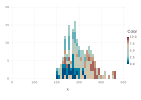

In [168]:
plot(x = sleep[:Reaction],Geom.histogram(bincount = 30), color = sleep[:Days])

### 散布図

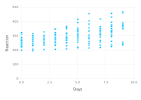

In [170]:
plot(sleep, x = "Days", y= "Reaction", Geom.point)

### 個々に被験者を分析

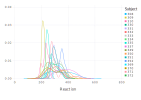

In [172]:
plot(sleep, x = "Reaction", Geom.density, color = "Subject")

### 基本的な描画

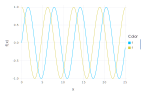

In [173]:
plot([sin,cos], 0, 25)

### irisデータ集合の可視化

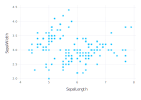

In [176]:
plot(dataset("datasets", "iris"),x="SepalLength", y="SepalWidth", Geom.point)

## 相関分析

In [178]:
a = rand(6)

6-element Array{Float64,1}:
 0.653516 
 0.887709 
 0.0399609
 0.428391 
 0.626731 
 0.440922 

In [179]:
autocov(a) # 自己共分散

6-element Array{Float64,1}:
  0.068201  
 -0.0170675 
 -0.0243243 
  0.0108038 
 -0.00182596
 -0.00168655

In [181]:
autocor(a) # 自己相関

6-element Array{Float64,1}:
  1.0      
 -0.250254 
 -0.356656 
  0.158412 
 -0.0267732
 -0.0247292

In [182]:
b = rand(6)

6-element Array{Float64,1}:
 0.5728   
 0.173071 
 0.947388 
 0.514661 
 0.0950688
 0.168653 

In [184]:
crosscor(a,b) # 相互共分散

11-element Array{Float64,1}:
 -0.024626  
  0.075539  
 -0.168756  
 -0.00493032
  0.345799  
 -0.739143  
  0.250225  
  0.604737  
  0.0228201 
 -0.28886   
 -0.0728047 